In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('lab3_lin4.csv')
df.head()

,x1,x2,y
0,1.1414,-0.0594,55.2686
1,-0.1517,-1.3385,-50.3732
2,-2.8140,0.1431,-145.5692
3,-0.6642,0.5702,-16.0423
4,-0.2069,-0.1609,-16.1340


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

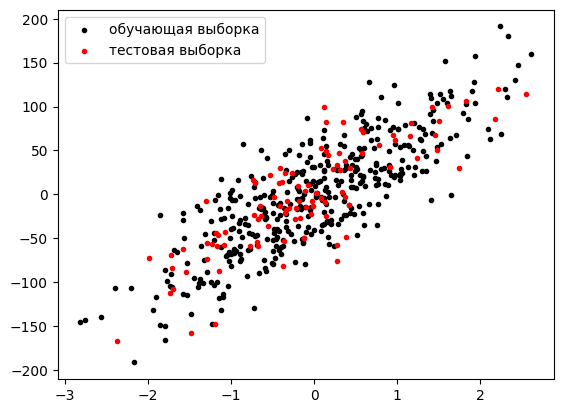

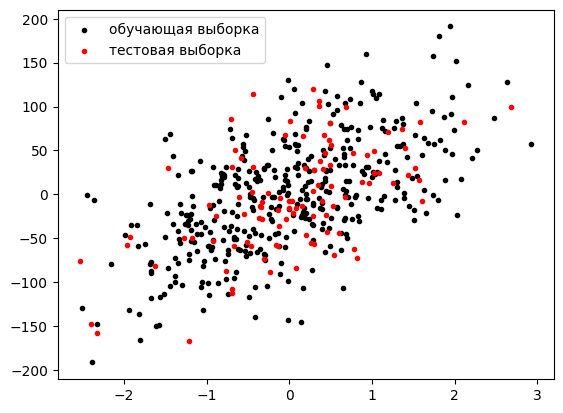

In [22]:
x1 = np.array(df["x1"]).reshape(-1, 1)
x2 = np.array(df["x2"]).reshape(-1, 1)
y = np.array(df["y"]).reshape(-1, 1)

# Разобьем данные на обучающую и тестовую выборки
x1_train, x1_test, x2_train, x2_test, y_train, y_test  = train_test_split(x1, x2, y, test_size=0.2)

# для x1
plt.scatter(x1_train, y_train, c="black", marker=".")
plt.scatter(x1_test, y_test, c="red", marker=".")
plt.legend(('обучающая выборка','тестовая выборка'))
plt.show()

# для x2
plt.scatter(x2_train, y_train, c="black", marker=".")
plt.scatter(x2_test, y_test, c="red", marker=".")
plt.legend(('обучающая выборка','тестовая выборка'))
plt.show()


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
train_arr = np.column_stack([x1_train, x2_train])
test_arr = np.column_stack([x1_test, x2_test])
lin_reg = LinearRegression()
lin_reg.fit(train_arr, y_train)
y_train_pred = lin_reg.predict(train_arr)
y_test_pred = lin_reg.predict(test_arr)
print(lin_reg.coef_, lin_reg.intercept_)

[[51.4310111  35.05196045]] [0.00977594]


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [26]:
# Коэффициент детерминации (R²) для обучающей выборки
print(r2_score(y_train, y_train_pred))

# Коэффициент детерминации (R²) для тестовой выборки
print(r2_score(y_test, y_test_pred))

# Средняя абсолютная ошибка (MAE) для обучающей выборки
print(mean_absolute_error(y_train, y_train_pred))

# Средняя абсолютная ошибка (MAE) для тестовой выборки
print(mean_absolute_error(y_test, y_test_pred))

# Средний абсолютный процент ошибки (MAPE) для обучающей выборки
print(mean_absolute_percentage_error(y_train, y_train_pred)*100)

# Средний абсолютный процент ошибки (MAPE) для тестовой выборки
print(mean_absolute_percentage_error(y_test, y_test_pred)*100)

0.9960475661726876
0.9961900829712099
3.203061086797372
2.9816211150077887
20.027929718135372
18.271726867095516


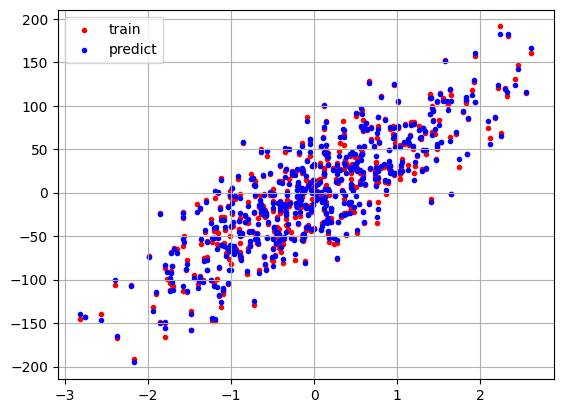

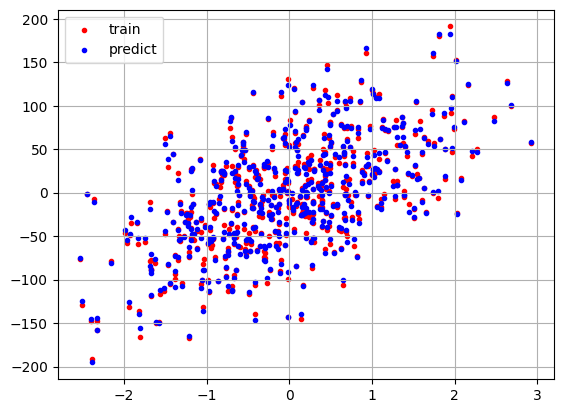

In [27]:
# Предсказание значений
y_pred = lin_reg.predict(np.column_stack([x1,x2]) )

plt.scatter(x1, y, c="red", marker='.', label='train')
plt.scatter(x1, y_pred, c="blue", marker='.', label='predict')
plt.legend()
plt.grid()
plt.show()

plt.scatter(x2, y, c="red", marker='.', label='train')
plt.scatter(x2, y_pred, c="blue", marker='.', label='predict')
plt.legend()
plt.grid()
plt.show()

In [28]:
df = pd.read_csv('lab3_poly1.csv')
df.head()

,x,y
0,-1.2547,3.4811
1,0.8172,-7.4786
2,-0.4300,-3.8623
3,1.4550,-20.3935
4,-0.6722,-5.8812


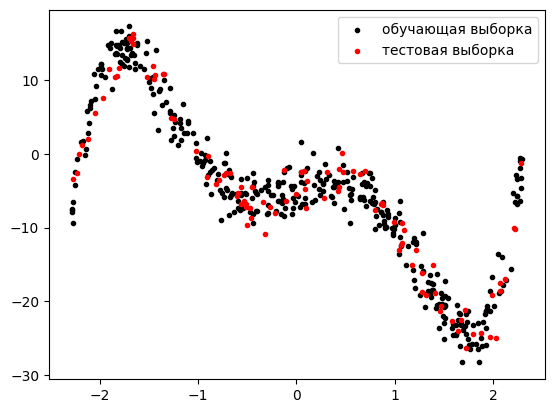

In [29]:
x = np.array(df["x"]).reshape(-1, 1)
y = np.array(df["y"]).reshape(-1, 1)

# Разобьем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2)

plt.scatter(x_train, y_train, c="black", marker=".")
plt.scatter(x_test, y_test, c="red", marker=".")
plt.legend(('обучающая выборка','тестовая выборка'))
plt.show()

[[-6.84312937]] [-4.91837688]


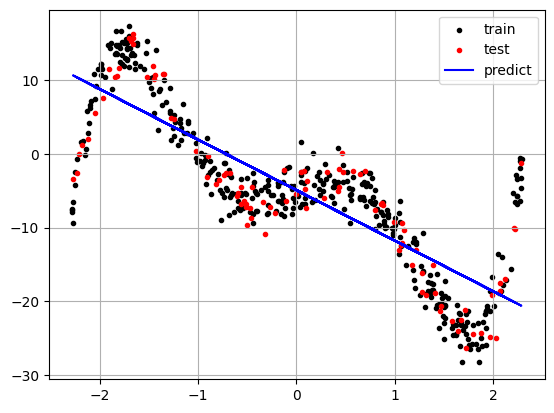

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

print(lin_reg.coef_, lin_reg.intercept_)

plt.scatter(x_train, y_train, c="black", marker='.')
plt.scatter(x_test, y_test, c="red", marker='.')
plt.plot(x_test, y_test_pred, 'b-')
plt.legend(('train', 'test', 'predict'))
plt.grid()
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

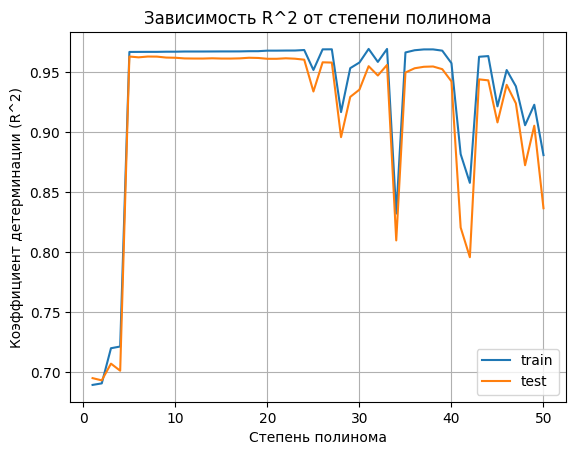

In [32]:
# Массив для хранения значений R^2
train_r2 = []
test_r2 = []

# Перебираем степени полинома от 1 до 50
degrees = np.arange(1, 51)
for degree in degrees:
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # Обучаем модель
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Предсказываем значения
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Вычисляем R^2
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Строим график
plt.plot(degrees, train_r2, label='train')
plt.plot(degrees, test_r2, label='test')
plt.xlabel('Степень полинома')
plt.ylabel('Коэффициент детерминации (R^2)')
plt.title('Зависимость R^2 от степени полинома')
plt.grid()
plt.legend()
plt.show()


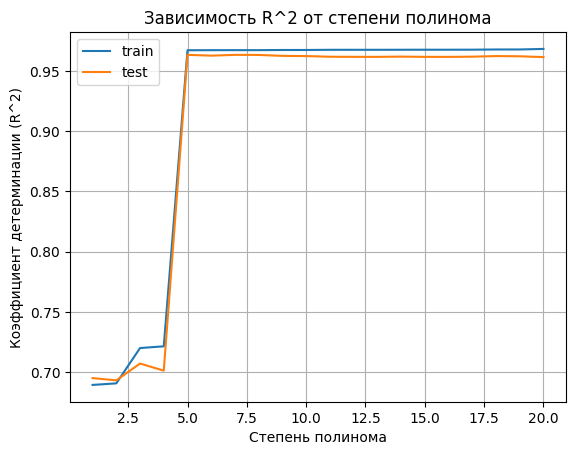

In [33]:
# Массив для хранения значений R^2
train_r2 = []
test_r2 = []

# Перебираем степени полинома от 1 до 50
degrees = np.arange(1, 21)
for degree in degrees:
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    # Обучаем модель
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Предсказываем значения
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Вычисляем R^2
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Строим график
plt.plot(degrees, train_r2, label='train')
plt.plot(degrees, test_r2, label='test')
plt.xlabel('Степень полинома')
plt.ylabel('Коэффициент детерминации (R^2)')
plt.title('Зависимость R^2 от степени полинома')
plt.grid()
plt.legend()
plt.show()

In [34]:
# Выбираем степень полинома
degree = 5

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Предсказываем значения
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Вычисляем коэффициент детерминации (R^2)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Вычисляем MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Вычисляем MAPE
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)*100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)*100


print("Коэффициенты модели:")
print(model.coef_[:,1:], model.intercept_)
print("\nКоэффициент детерминации (R^2):")
print("Обучающая выборка:", train_r2)
print("Тестовая выборка:", test_r2)
print("\nMAPE (Mean Absolute Percentage Error):")
print("Обучающая выборка:", train_mape)
print("Тестовая выборка:", test_mape)
print("\nMAE (Mean Absolute Error):")
print("Обучающая выборка:", train_mae)
print("Тестовая выборка:", test_mae)

Коэффициенты модели:
[[  4.25427452  -0.14142269 -11.23332286   0.02668262   2.04984376]] [-4.90508696]

Коэффициент детерминации (R^2):
Обучающая выборка: 0.9671276654187961
Тестовая выборка: 0.9633075351355684

MAPE (Mean Absolute Percentage Error):
Обучающая выборка: 69.50132548743568
Тестовая выборка: 139.4586030514847

MAE (Mean Absolute Error):
Обучающая выборка: 1.5599628558963965
Тестовая выборка: 1.6555225636388176


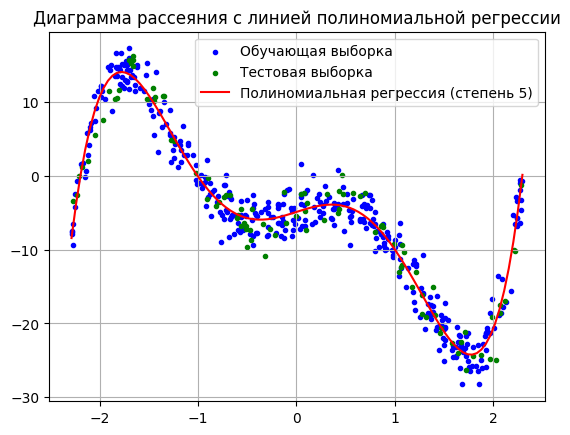

In [35]:
# Диаграмма рассеяния обучающих данных
plt.scatter(x_train, y_train, color='blue', label='Обучающая выборка', marker='.')

# Диаграмма рассеяния тестовых данных
plt.scatter(x_test, y_test, color='green', label='Тестовая выборка', marker='.')

# Линия полинома
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)
plt.plot(x_range, y_range_pred, color='red', label='Полиномиальная регрессия (степень 5)')

plt.title('Диаграмма рассеяния с линией полиномиальной регрессии')
plt.legend()
plt.grid()
plt.show()

In [36]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [37]:
# Предобработка данных

# 1. Замена текстовых данных на числовые
# Например, "Yes" на 1, "No" на 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# 2. Удаление null значений (если такие есть)
df.dropna(inplace=True)

# 3. Удаление дубликатов
df.drop_duplicates(inplace=True)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [38]:
# Предположим, что 'Performance Index' - это целевая переменная (отклик)
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

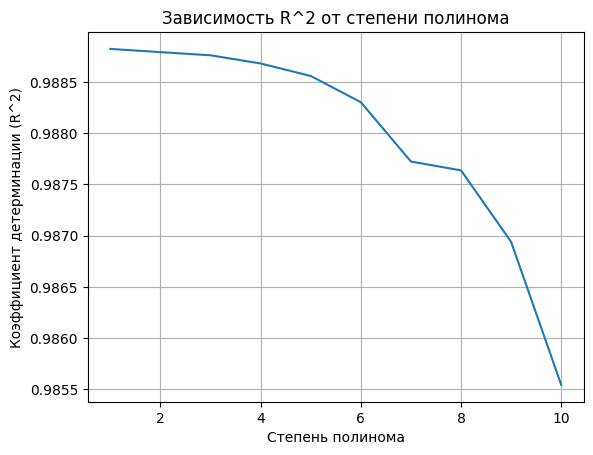

In [39]:
# Массив для хранения значений R^2
test_r2 = []

degrees = np.arange(1, 11)
for degree in degrees:
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)

    # Обучаем модель
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Предсказываем значения
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Вычисляем R^2
    test_r2.append(r2_score(y_test, y_test_pred))

# Строим график
plt.plot(degrees, test_r2)
plt.xlabel('Степень полинома')
plt.ylabel('Коэффициент детерминации (R^2)')
plt.title('Зависимость R^2 от степени полинома')
plt.grid()
plt.show()

In [40]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вычисление метрик
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Вывод результатов
print("Коэффициенты модели:")
print(model.coef_)
print("Свободный член (intercept):", model.intercept_)
print("\nКоэффициент детерминации (R²):")
print("Обучающая выборка:", train_r2)
print("Тестовая выборка:", test_r2)
print("\nMAE (Mean Absolute Error):")
print("Обучающая выборка:", train_mae)
print("Тестовая выборка:", test_mae)
print("\nMAPE (Mean Absolute Percentage Error):")
print("Обучающая выборка:", train_mape)
print("Тестовая выборка:", test_mape)

# # Построение графика предсказанных значений против истинных значений
# plt.scatter(y_train, y_train_pred, color='blue', label='Обучающая выборка', marker='.')
# plt.scatter(y_test, y_test_pred, color='green', label='Тестовая выборка', marker='.')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')
# plt.xlabel('Истинные значения')
# plt.ylabel('Предсказанные значения')
# plt.title('Истинные значения vs Предсказанные значения')
# plt.legend()
# plt.grid(True)
# plt.show()



Коэффициенты модели:
[2.85984098 1.01745204 0.60151002 0.49162489 0.19587886]
Свободный член (intercept): -34.126531234999185

Коэффициент детерминации (R²):
Обучающая выборка: 0.9886413077403374
Тестовая выборка: 0.9888206217381484

MAE (Mean Absolute Error):
Обучающая выборка: 1.6241735062840095
Тестовая выборка: 1.6194554187346024

MAPE (Mean Absolute Percentage Error):
Обучающая выборка: 3.473794124998928
Тестовая выборка: 3.4465470330218397


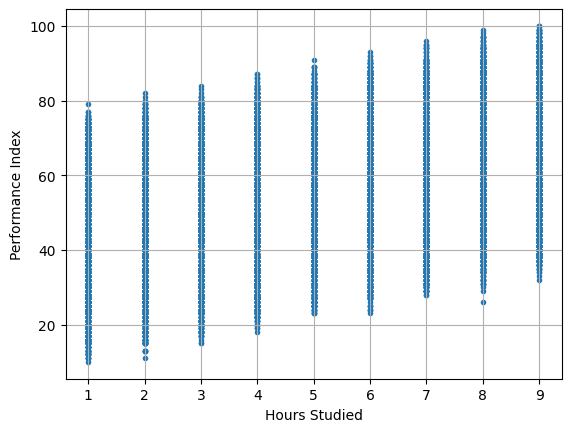

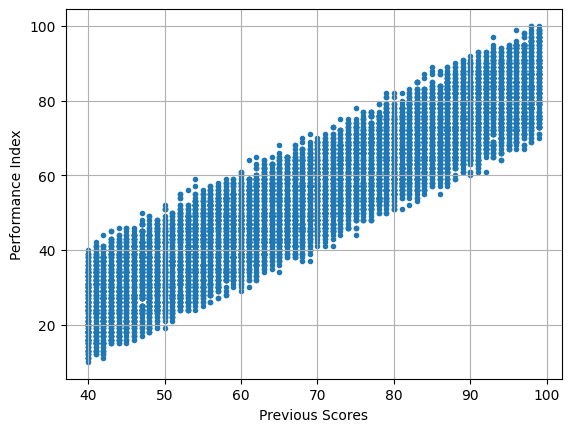

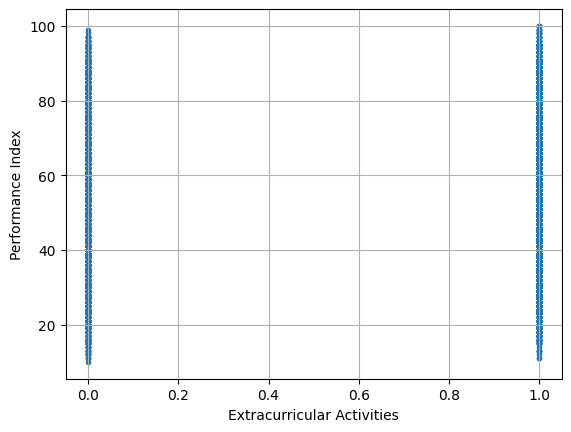

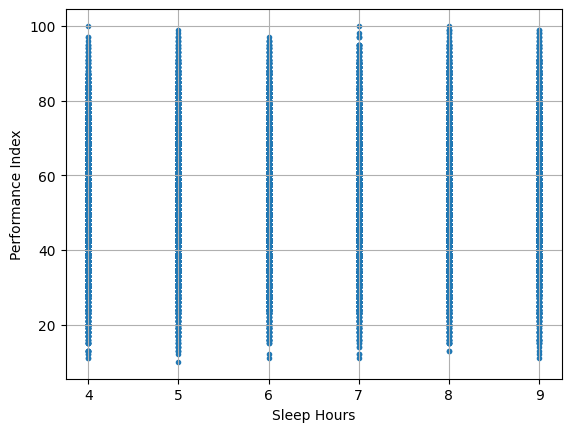

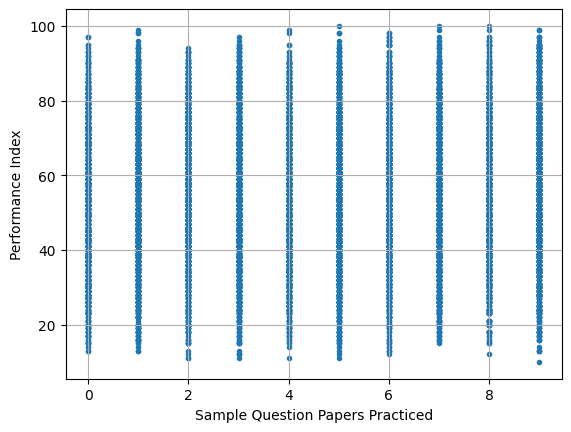

In [41]:
# Построение диаграмм рассеяния для каждого признака
for column in X.columns:
    plt.scatter(X[column], y, marker='.')
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.grid()
    plt.show()

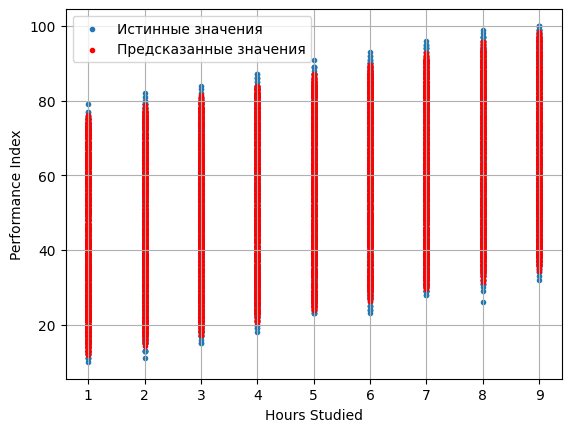

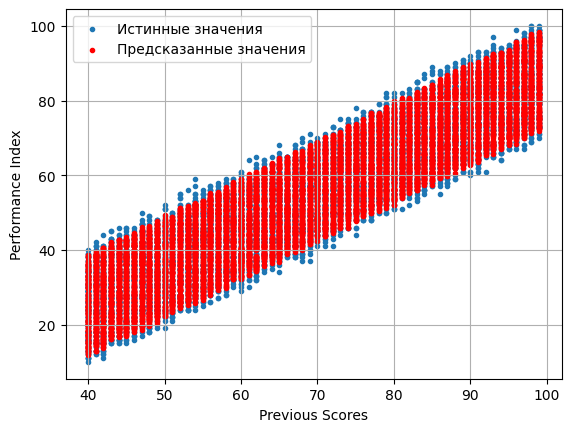

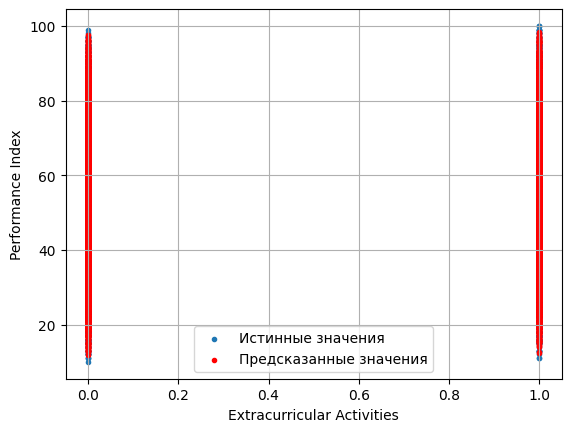

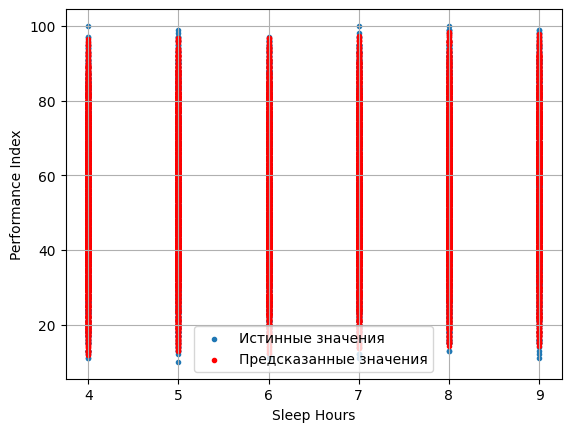

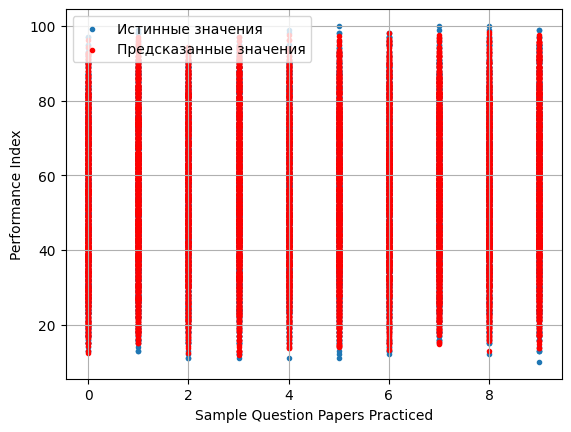

In [42]:
# Предсказание значений
y_pred = model.predict(X)

# Построение диаграмм рассеяния для каждого признака с предсказаниями
for column in X.columns:
    plt.scatter(X[column], y, marker='.', label='Истинные значения')
    plt.scatter(X[column], y_pred, marker='.', color='red', label='Предсказанные значения')
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.grid()
    plt.legend()
    plt.show()